In [5]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model


In [1]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = np.expand_dims(train_X, axis=-1)  # Add a channel dimension for ResNet50
train_X = np.repeat(train_X, 3, axis=-1)  # Repeat the single channel to simulate 3 channels
train_X = np.pad(train_X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Resize to 224x224
train_y = to_categorical(train_y, 10)

NameError: name 'mnist' is not defined

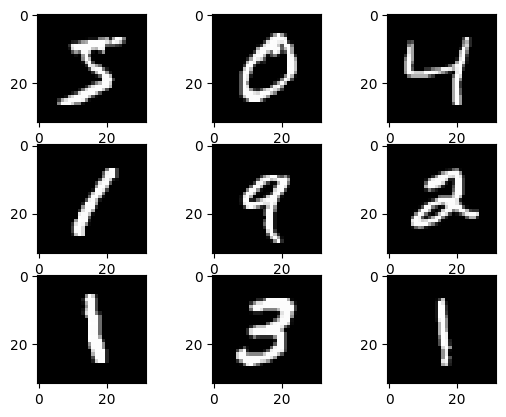

In [3]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [27]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(10, activation='softmax'))

model.layers[0].trainable=False
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x = train_X, y= train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 137s 71ms/step - loss: 0.3630 - accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2092 - accuracy: 0.9335
Epoch 3/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.1794 - accuracy: 0.9422
Epoch 4/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1653 - accuracy: 0.9468
Epoch 5/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1546 - accuracy: 0.9505
Epoch 6/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.1462 - accuracy: 0.9528
Epoch 7/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.1381 - accuracy: 0.9555
Epoch 8/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1315 - accuracy: 0.9569
Epoch 9/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1299 - accuracy: 0.9577
Epoch 10/10
1875/1875 [==============================] 

In [30]:
model.save('NN/model_mnist_renet50.h5')

In [6]:
model_final = load_model('model_renet50.h5')
test_X = np.expand_dims(test_X, axis=-1)  # Add a channel dimension for ResNet50
test_X = np.repeat(test_X, 3, axis=-1)  # Repeat the single channel to simulate 3 channels
test_X = np.pad(test_X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Resize to 224x224
result = model_final.evaluate(test_X, to_categorical(test_y, 10))
print(result)

313/313 [==============================] - 27s 82ms/step - loss: 0.1846 - accuracy: 0.9479
[0.18462827801704407, 0.9478999972343445]


In [12]:
pred = model_final.predict(test_X[9:10])

1/1 [==============================] - 0s 45ms/step


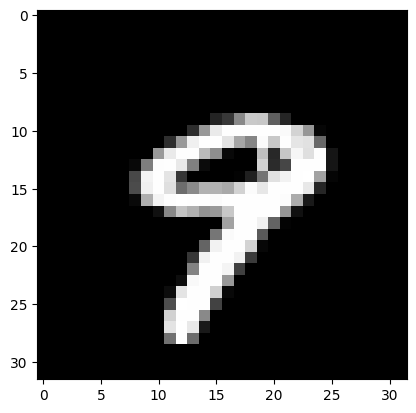

In [13]:
pyplot.imshow(test_X[9], cmap=pyplot.get_cmap('gray'))

In [15]:
np.argmax(pred[0])

9